In [96]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
%matplotlib inline

In [97]:
rcParams['figure.figsize']=15, 6

In [98]:
dt = pd.read_csv('air.csv')
print(dt)
dt.head
dt.dtypes

       Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
5    1949-06          135
6    1949-07          148
7    1949-08          148
8    1949-09          136
9    1949-10          119
10   1949-11          104
11   1949-12          118
12   1950-01          115
13   1950-02          126
14   1950-03          141
15   1950-04          135
16   1950-05          125
17   1950-06          149
18   1950-07          170
19   1950-08          170
20   1950-09          158
21   1950-10          133
22   1950-11          114
23   1950-12          140
24   1951-01          145
25   1951-02          150
26   1951-03          178
27   1951-04          163
28   1951-05          172
29   1951-06          178
..       ...          ...
114  1958-07          491
115  1958-08          505
116  1958-09          404
117  1958-10          359
118  1958-11          310
119  1958-12          337
120  1959-01

Month          object
#Passengers     int64
dtype: object

In [99]:
dt.index

RangeIndex(start=0, stop=144, step=1)

In [100]:
datPa = lambda d: pd.datetime.strptime(d, '%Y-%m')
dt = pd.read_csv('air.csv', parse_dates=['Month'], index_col='Month', date_parser=datPa)

In [101]:
dt.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [102]:
dft = pd.DataFrame(data=dt)

In [103]:
dft.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [104]:
dft.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [105]:
dft.loc['1949-01-01']

#Passengers    112
Name: 1949-01-01 00:00:00, dtype: int64

In [106]:
dft.loc['1949-01-01':'1949-05-01']

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


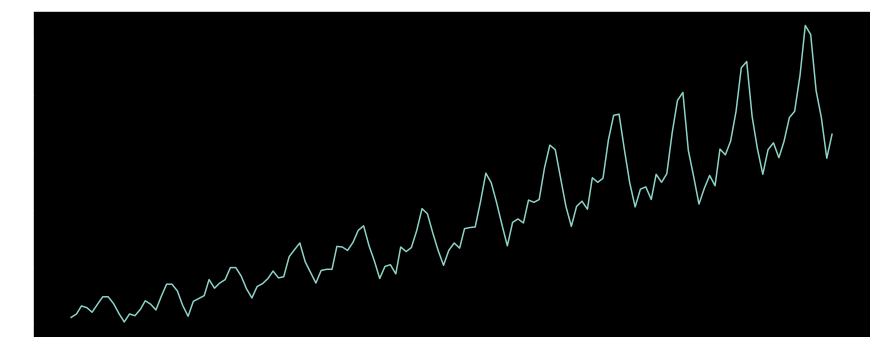

In [107]:
plt.plot(dft)
#Overall increasing trend along with some seasonal variations

In [108]:
from statsmodels.tsa.stattools import adfuller
def staTest(ts):
    plt.legend(loc='best')
    plt.title('The Rolling Mean and the standard deviation')

    rllMn = dft.rolling(12).mean()
    #pd.rolling_mean(ts, window=12)
    rllStd = dft.rolling(12).std()
    #pd.rolling_std(ts, window = 12)
    Osh = plt.plot(ts, label='Showing Original...', color = 'blue')
    mn = plt.plot(rllMn, color = 'red', label = 'The Rolling Mean')
    std = plt.plot(rllStd, color='white', label='The Rolling Standard Deviation')
    plt.show(block=False)

    #print('Dicky Fuller Test -- Results')
    #tstDF = adfuller(ts, autolag='AIC') 
    #outDF = pd.Series(tstDF[0:4], index=['dft', - 'p-valuee', '#Lags Use d', 'Number of Observatoin Used'])
    #for key,value in tstDF[4].items():
    #outDF['Critical Value (%s)' %key] = value
    #print (outDF) #

No handles with labels found to put in legend.


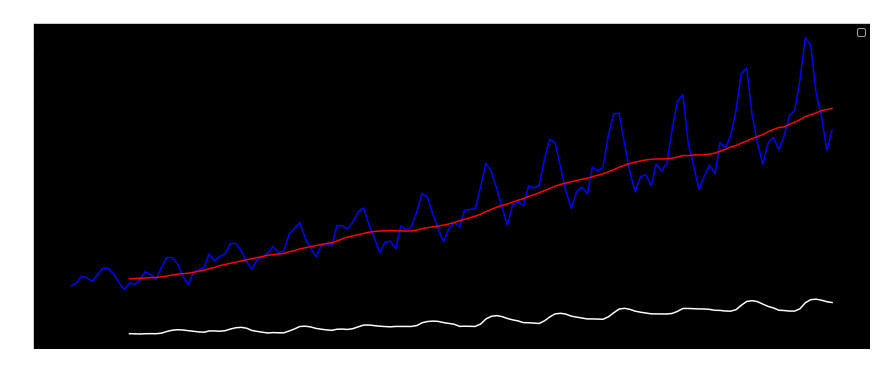

In [109]:
staTest(dft)

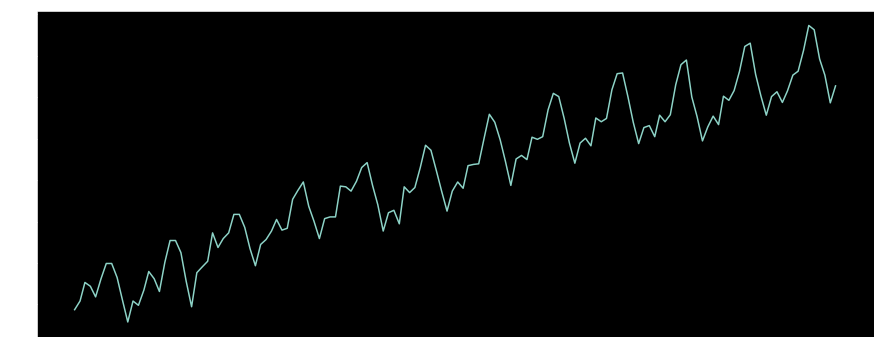

In [110]:
ts_log = np.log(dft)
plt.plot(ts_log)

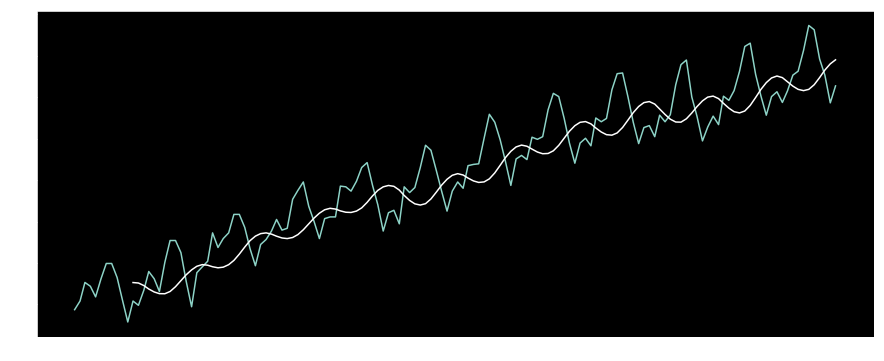

In [111]:
import pandas
moving_avg=ts_log.rolling(12, win_type='triang').mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='white')

In [112]:
ts_log_moving_avg_diff = ts_log-moving_avg
ts_log_moving_avg_diff.head(12)


,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


No handles with labels found to put in legend.


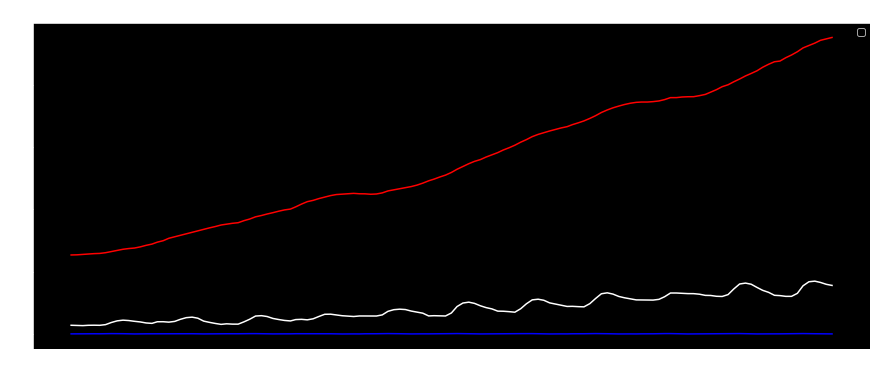

In [113]:
ts_log_moving_avg_diff.dropna(inplace=True)
staTest(ts_log_moving_avg_diff)
